In [2]:
import sys
sys.path.append('././src/')

from TrafficLight import PeriodicTrafficLight, AdaptiveTrafficLight, TrafficLightMirror
import Model1
import Model2
from ModelEvaluation import Evaluator, MultiEvaluator
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [3]:
output_path = '././data/'

*Periodic traffic lights*

In [41]:
light_ew = PeriodicTrafficLight()
light_ew.initialize(period=30, time_delay=0)

light_ns = TrafficLightMirror()
light_ns.initialize(traffic_light=light_ew)

*Adaptive traffic lights*

In [16]:
light_ew = AdaptiveTrafficLight()
light_ew.initialize(sensor_depth=8, rule=2)

light_ns = TrafficLightMirror()
light_ns.initialize(traffic_light=light_ew)

*Single four-way intersection*

In [42]:
network = Model1.IntersectionNetworkSimulator()
network.initialize(grid_dimensions=(1,1))
network.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=0.5, avg_arrival_time_n=4, avg_arrival_time_e=3, avg_arrival_time_s=4, avg_arrival_time_w=3)
network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
network.set_observable_intersections(grid_inds=network.grid_inds)

*Evaluation*

In [9]:
evaluators = []

In [18]:
evaluator = Evaluator()
network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
evaluator.initialize(network=network)
output = evaluator.simulate(num_trials=300, end_time=1000, delta_t=0.1)
average = evaluator.compute_average()
evaluators += [evaluator]

Finished 10 trials.
Finished 20 trials.
Finished 30 trials.
Finished 40 trials.
Finished 50 trials.
Finished 60 trials.
Finished 70 trials.
Finished 80 trials.
Finished 90 trials.
Finished 100 trials.
Finished 110 trials.
Finished 120 trials.
Finished 130 trials.
Finished 140 trials.
Finished 150 trials.
Finished 160 trials.
Finished 170 trials.
Finished 180 trials.
Finished 190 trials.
Finished 200 trials.
Finished 210 trials.
Finished 220 trials.
Finished 230 trials.
Finished 240 trials.
Finished 250 trials.
Finished 260 trials.
Finished 270 trials.
Finished 280 trials.
Finished 290 trials.
Finished 300 trials.


In [ ]:
green_ratios = [0.45,0.5,0.55,0.6,0.65]
evaluators = []

for green_ratio in green_ratios:
    evaluator = Evaluator()
    network.intersections[(0,0)].traffic_light_ew.green_ratio=green_ratio
    evaluator.initialize(network=network)
    output = evaluator.simulate(num_trials=300, end_time=1000, delta_t=0.1)
    average = evaluator.compute_average()

    evaluators += [evaluator]

In [43]:
durations = [10,30,50,70,90]
evaluators = []

for duration in durations:
    evaluator = Evaluator()
    network.intersections[(0,0)].traffic_light_ew.period=duration
    evaluator.initialize(network=network)
    output = evaluator.simulate(num_trials=300, end_time=1000, delta_t=0.1)
    average = evaluator.compute_average()

    evaluators += [evaluator]

Finished 10 trials.
Finished 20 trials.
Finished 30 trials.
Finished 40 trials.
Finished 50 trials.
Finished 60 trials.
Finished 70 trials.
Finished 80 trials.
Finished 90 trials.
Finished 100 trials.
Finished 110 trials.
Finished 120 trials.
Finished 130 trials.
Finished 140 trials.
Finished 150 trials.
Finished 160 trials.
Finished 170 trials.
Finished 180 trials.
Finished 190 trials.
Finished 200 trials.
Finished 210 trials.
Finished 220 trials.
Finished 230 trials.
Finished 240 trials.
Finished 250 trials.
Finished 260 trials.
Finished 270 trials.
Finished 280 trials.
Finished 290 trials.
Finished 300 trials.
Finished 10 trials.
Finished 20 trials.
Finished 30 trials.
Finished 40 trials.
Finished 50 trials.
Finished 60 trials.
Finished 70 trials.
Finished 80 trials.
Finished 90 trials.
Finished 100 trials.
Finished 110 trials.
Finished 120 trials.
Finished 130 trials.
Finished 140 trials.
Finished 150 trials.
Finished 160 trials.
Finished 170 trials.
Finished 180 trials.
Finished 1

In [44]:
multi_eval = MultiEvaluator()
multi_eval.initialize(evaluators=evaluators, labels=durations, variable="cycle length")

In [11]:
evaluators = list(multi_eval.evaluators.values())
e_dict = {}
for i,label in enumerate(['$A_2$', '$B$', '$C$']):
    e_dict[label] = evaluators[i]
multi_eval.evaluators = e_dict
multi_eval.variable = "Scenario"

In [12]:
multi_eval.save_to_file(file_name="periodic_vs_adaptive1&2.pkl")

In [6]:
multi_eval = MultiEvaluator()
multi_eval = multi_eval.read_file(file_name="periodic_vs_adaptive1&2.pkl")

In [5]:
evaluator = list(multi_eval.evaluators.values())[1]
evaluator.save_to_file(file_name="periodic_30s_0.5")

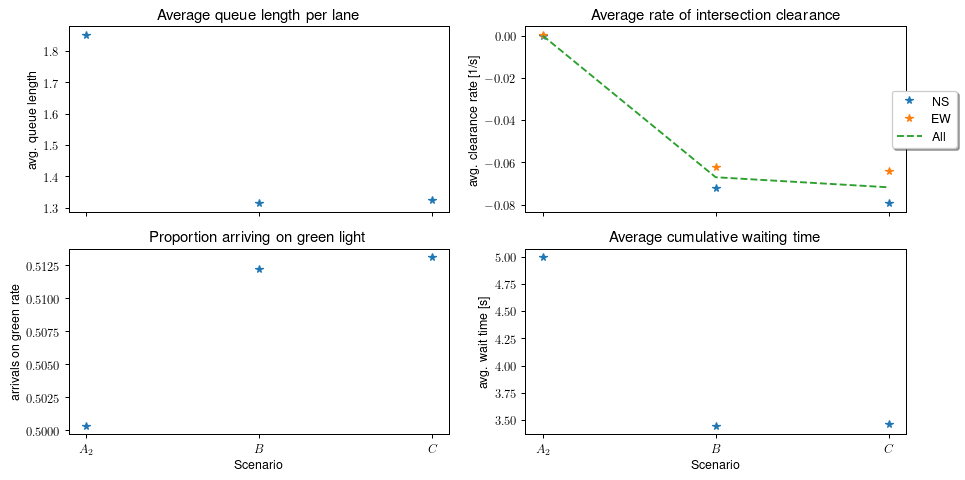

In [13]:
fig,axs = multi_eval.plot_intersection_averages(plt=plt, grid_ind=(0,0), fig_size=(12,6), plot_tot_switches=False)
plt.savefig(output_path+'figs/intersection_avgs', bbox_inches='tight')

In [ ]:
fig,axs = multi_eval.plot_queue_averages(plt=plt, grid_ind=(0,0), fig_size=(4,5))
plt.savefig(output_path+'figs/queue_avgs', bbox_inches='tight')

In [ ]:
fig,axs = multi_eval.plot_avg_wait_times(plt=plt, fig_size=(7,2))
plt.savefig(output_path+'figs/wait_times', bbox_inches='tight')

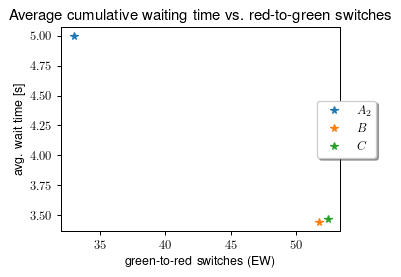

In [14]:
fig,ax = multi_eval.compare_metrics(plt=plt, x_axis="tot_switches_ew", y_axis="avg_wait_time", grid_ind=(0,0), fig_size=(4,3))
ax.set(xlabel="green-to-red switches (EW)", ylabel="avg. wait time [s]")
ax.set_title("Average cumulative waiting time vs. red-to-green switches")
plt.savefig(output_path+'figs/payoff', bbox_inches='tight')

In [37]:
scen = 'adaptive 2'
print('{:1.3f}'.format(multi_eval.evaluators[scen].average[(0,0)]['avg_wait_time']))
print('{:1.3f}'.format(multi_eval.evaluators[scen].average[(0,0)]['avg_queue_length']))
print('{:1.6f}'.format(multi_eval.evaluators[scen].average[(0,0)]['avg_clearance_rate_ew']))
print('{:1.6f}'.format(multi_eval.evaluators[scen].average[(0,0)]['avg_clearance_rate_ns']))
print('{:1.3f}'.format(multi_eval.evaluators[scen].average[(0,0)]['arrivals_on_green_rate']))

3.466
1.326
-0.064205
-0.079464
0.513
